## 《流浪地球》猫眼影评数据分析

### 导入数据分析所需的库

In [1]:
# 爬虫及数据分析库
import pandas as pd
import time,random
import datetime as dt
import requests
import json

In [3]:
# 准备多个移动端备用的user_agents
user_agents = [
            {'User-Agent': 'MQQBrowser/26 Mozilla/5.0 (Linux; U; Android 2.3.7; zh-cn; MB200 Build/GRJ22; CyanogenMod-7) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'},
            {'User-Agent': 'Mozilla/5.0 (hp-tablet; Linux; hpwOS/3.0.0; U; en-US) AppleWebKit/534.6 (KHTML, like Gecko) wOSBrowser/233.70 Safari/534.6 TouchPad/1.0'},
            {'User-Agent': 'Mozilla/5.0 (compatible; MSIE 9.0; Windows Phone OS 7.5; Trident/5.0; IEMobile/9.0; HTC; Titan)'},
            {'User-Agent': 'Mozilla/5.0 (SymbianOS/9.4; Series60/5.0 NokiaN97-1/20.0.019; Profile/MIDP-2.1 Configuration/CLDC-1.1) AppleWebKit/525 (KHTML, like Gecko) BrowserNG/7.1.18124'},
            {'User-Agent': 'Mozilla/5.0 (Linux; U; Android 3.0; en-us; Xoom Build/HRI39) AppleWebKit/534.13 (KHTML, like Gecko) Version/4.0 Safari/534.13'},
            {'User-Agent': 'Mozilla/5.0 (iPod; U; CPU iPhone OS 4_3_3 like Mac OS X; en-us) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8J2 Safari/6533.18.5'},
            {'User-Agent': 'Mozilla/5.0 (iPad; U; CPU OS 4_3_3 like Mac OS X; en-us) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8J2 Safari/6533.18.5'},
            {'User-Agent': 'Mozilla/5.0 (Linux; U; Android 2.3.7; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'},
            ]

### 爬虫详细代码实现

In [4]:
# 创建爬虫类
class MovieSpider(object):
    def __init__(self, filename):
        self.headers = user_agents
        self.filename = filename
        
    def get_data(self, header, url):
        '''
        功能：访问url的网址，获取网页内容并返回
        参数：url,目标网页的url
        返回：目标网页的html内容
        '''
        try:
            print('++++++++++++++++++++++')
#             print(header)
            r = requests.get(url, headers=header)
            r.raise_for_status()
            return r.text
        except Exception as e:
            print(e)
    
    def parse_data(self, html):
        '''
        功能：提取 html 页面信息中的关键信息，并整合一个数组并返回
        参数：html 根据 url 获取到的网页内容
        返回：存储有 html 中提取出的关键信息的数组
        '''
#         print(html)
        json_data = json.loads(html)['cmts']
        comments = []
        
        try:
            for item in json_data:
                comment = []
                comment.append(item['nickName'])
                comment.append(item['cityName'] if 'cityName' in item else '')
                comment.append(item['content'].strip().replace('\n', ''))
                comment.append(item['score'])
                comment.append(item['startTime'])
                comment.append(item['gender']  if 'gender' in item else '')
                
                comments.append(comment)

            return comments
        
        except Exception as e:
            print(comment)
            print(e)
    
    def save_data(self, comments):
        '''
        功能：将comments中的信息输出到文件中/或数据库中。
        参数：comments 将要保存的数据
        '''
        
        df = pd.DataFrame(comments)
        df.to_csv(self.filename, mode='a', encoding='utf_8_sig', index=False, sep=',', header=False)
    
    def run(self, time_lists):
        '''
        功能：爬虫调度器，根据规则每次生成一个新的请求 url，爬取其内容，并保存到本地。
        '''
#         start_time = dt.datetime.now().strftime('%Y-%m-%d  %H:%M:%S')
        start_time = time_lists[0]  # 电影上映时间，评论爬取到此截至
        end_time = time_lists[-1]  # 电影上映时间，评论爬取到此截至
        print('*******************')
        
        # 抓取评论信息
        i = 0
        while start_time > end_time:
            i += 1
            if i%10 ==0:
                print('已爬取%s页评论'%i)
            url = 'http://m.maoyan.com/mmdb/comments/movie/248906.json?_v_=yes&offset=0&startTime=' + start_time.replace('  ', '%20')
            header = random.choice(self.headers)
            time.sleep(0.05)
#             print('**********************************************')
#             print(url)
            html = None
            
            try:
                html = self.get_data(header, url)
#                 print(html)

            except Exception as e:
                print('*************************')
                time.sleep(0.83)
                html = self.get_data(url)
                print(e)

            else:
                time.sleep(0.3)

            # 解析评论信息
            comments = self.parse_data(html)
#             print(comments[0])
            #print(url)
            start_time = comments[14][4]
#             print(start_time)

            start_time = dt.datetime.strptime(start_time, '%Y-%m-%d  %H:%M:%S') + dt.timedelta(seconds=-1)
            start_time = dt.datetime.strftime(start_time, '%Y-%m-%d  %H:%M:%S')

            self.save_data(comments)

In [15]:
t1 = ['2019-02-12  18:59:59','2019-02-12  00:00:00']
time_lists = t1
filename = '流浪地球%s_comments.csv'%time_lists[1].split()[0]
spider = MovieSpider(filename)
spider.run(time_lists)
print('爬取信息结束')

*******************
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
已爬取10页评论
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
已爬取20页评论
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
已爬取30页评论
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
已爬取40页评论
++++++++++++++++++++++
++++++++++++++++++++++
+

## 数据清洗

### 读取、合并csv文件
* 爬取电影上映7天的影评信息(02-05---02-11）
* 数据信息合并到 ‘流浪地球01_comments.csv’ 文件中

In [2]:
import glob
csv_files = glob.glob('./*.csv')

# 定义数据特征属性
df = pd.DataFrame(columns=['昵称','城市','评语','评分','日期','性别标签'])

# 文件合并
for file in csv_files:
    data = pd.read_csv(file, names=['昵称','城市','评语','评分','日期','性别标签'],
                       encoding='utf_8_sig',engine='python',header=None)
    data.to_csv('合并文件/流浪地球01_comments.csv', mode='a', 
                encoding='utf_8_sig', index=False, sep=',')

### 粉丝城市分布信息可视化

In [3]:
# 读取合并后的文件信息
datas = pd.read_csv('合并文件/流浪地球01_comments.csv',
                encoding='utf_8_sig',engine='python')
# 查看数据的基本信息属性
datas.describe()

,昵称,城市,评语,评分,日期,性别标签
count,267014,266354,266994,266974,266968,141429
unique,239386,1061,247327,12,190455,3
top,.,北京,好看好看好看,5.0,2019-02-07 00:00:00,1.0
freq,379,8615,972,188289,16,89518


In [4]:
# 统计各城市出现的数据信息
ct_datas = pd.DataFrame(datas['城市'])
# 将城市名称为空的数据删除
ct_datas = ct_datas.dropna(axis=0)
print(ct_datas.dtypes)

# 统计每个城市的评论人数
city_lists = []
for city in ct_datas['城市']:
    if city:
        city_lists.append(city) 
    else:
        continue

# 统计城市的数量，添加到集合中
city_sets = {}
for city in city_lists:
    if city not in city_sets:
        city_sets[city] = 1
    city_sets[city] += 1
print('-----------')

# 将城市信息和评论数量以元组格式添加到列表中
def gen_city_infos(city, city_sets):
    city_infos = []
    for city in city_sets:
        if city:
            ct = tuple((city, city_sets[city]))
            city_infos.append(ct)
    city_infos[-5:]
    # city_lists[nan]
    return city_infos

city_infos = gen_city_infos(city, city_sets)
data = city_infos
print(len(data))

城市    object
dtype: object
-----------
1061


In [5]:
# 导入库，指明文件的默认编码格式，识别中文字符
import importlib
import sys
importlib.reload(sys)

<module 'sys' (built-in)>

In [39]:
# 导入pyecharts进行城市数据分析
from pyecharts import Geo


for i in range(len(data)):
    geo = Geo("《流浪地球》全国观影粉丝分布图", "data from pm2.5", title_color="#fff",
          title_pos="center", width=800,
          height=600, background_color='#404a59')
    attr, value = geo.cast(data)

    
    try:
        geo.add("", attr, value, visual_range=[0, 200], maptype='china',
                visual_text_color="#fff",symbol_size=10, is_visualmap=True)
    except Exception as e:
#         print(e)
        # 在异常信息中提取无法被pyecharts识别的城市
        city = str(e).split()[-1]
        print(city)
        # 剔除无法识别的城市信息
        city_sets.pop(city)
        city_infos = gen_city_infos(city, city_sets)
        data = city_infos
print(len(city_infos))
# 绘制全国观影粉丝分布图
#生成html文件
geo.render("全国观影粉丝分布图.html")
#直接在notebook中显示
geo

687


### 粉丝来源柱状图
* 采用pyecharts.Bar函数

In [7]:
from pyecharts import Bar
from pyecharts import Style

# 统计各城市出现的数据信息
ct_datas = pd.DataFrame(datas['城市'])
# 将城市名称为空的数据删除
ct_datas = ct_datas.dropna(axis=0)

# 定义样式
style = Style(
    title_color='#fff',
    title_pos='center',
    width=800,
    height=500,
    background_color='#404a59',
    subtitle_color='#fff'
)

# 根据城市数据生成柱状图
city_counts = ct_datas.groupby("城市").size()
city_sorted = city_counts.sort_values(ascending=False).head(20)

bar = Bar("《流浪地球》评星人来源排行TOP20", "蜗牛行天下", **style.init_style)
attr, value = bar.cast(list(city_sorted.items()))
bar.add("", attr, value, is_visualmap=True, visual_range=[0, 2500],
        visual_text_color='#fff', label_color='#fff',
        xaxis_label_textcolor='#fff', yaxis_label_textcolor='#fff', 
        is_more_utils=True,is_label_show=True)
bar.render("评星人来源排行-柱状图.html")
bar

### 星级评价饼状图
* 采用pyecharts.Pie方法

In [8]:
# 导入Pie组件，用于生成饼图
from pyecharts import Pie

# pandas读取数据
df_score =  pd.DataFrame(datas['评分'])

# 设定五个等级的星级标签
attr = ["一星", "二星", "三星", "四星", "五星"]
score = df_score.groupby("评分").size()  # 分组求和
# print(score)

value = [
    score.iloc[0] + score.iloc[1] + score.iloc[2], # 0,0.5,1分均定为一星
    score.iloc[3] + score.iloc[4],  # 1.5，2分均定位二星
    score.iloc[5] + score.iloc[6],  # 2.5,3分均定为三星
    score.iloc[7] + score.iloc[8],  # 3.5,4分均定为四星
    score.iloc[9] + score.iloc[10], # 4.5，5分均定为五星
]

In [9]:
pie = Pie('《流浪地球》评星比例', title_pos='left', width=800)
pie.use_theme("dark")
pie.add("评分", attr, value, center=[60, 60], radius=[25, 75], 
        rosetype='raea', is_legend_show=True, is_label_show=True)
pie.render('评星.html')
pie

### 词云图
* 利用jieba库进行中文分词
* Matplotlib进行画图
* wordcloud库生成词云图

In [10]:
import jieba
import matplotlib.pyplot as mp
from wordcloud import STOPWORDS, ImageColorGenerator,WordCloud
# from pyecharts import WordCloud

#### 将评语保存为txt格式文件

In [11]:
dt_coms = pd.DataFrame(datas['评语'])
dt_coms.to_csv("流浪地球_影评.txt",
               sep='\t', index=False)

In [12]:
# 获取所有的评论
comments = []

with open("流浪地球_影评01.txt", 'r', encoding='utf-8') as f:
    rows = f.readlines()
    for row in rows:
        try:
            comment = row.strip().split(',')
        except IndexError:
            continue
        if comment:
            comments.append(comment)
print(len(comments))

524


In [13]:
# 设置分词
com_aft_spl = jieba.cut(
    str(comments),cut_all=False) # 非全模式分词，cut_all=False
words = ' '.join(com_aft_spl)
print(words)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Python\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Loading model from cache C:\Users\Python\AppData\Local\Temp\jieba.cache
Loading model cost 1.013 seconds.
DEBUG:jieba:Loading model cost 1.013 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


[ [ ' \ ufeff 太烂 了 ！ 很多年 没 看过 这么 烂 的 电影 了 ， 已经 无法形容 烂 的 程度 ， 开场 不到 二十分钟 我 就 睡着 了 ， 睡醒 后 离场 ， 浪费 钱 和 时间 ' ] ,   [ ' 时间 冲突 没有 去 看 ， 但是 都 说好 ' ] ,   [ ' 虽 没有 到达 我 想要 的 效果 ， 但 算是 一个 国版 科幻 的 里程碑 ， 支持 ！ ' ] ,   [ ' 很 好看 的 电影 ， 值 👍 👍 👍 ' ] ,   [ ' 很 牛 掰 的 电影 。 已 超越 欧美 。 ' ] ,   [ ' 非常 好看 的 科幻片 ， 加油 💪 ' ] ,   [ ' 超赞 国产 科幻片 ， 技术 和 情节 还有 演员 的 演技 都 超赞 ！ ' ] ,   [ ' 挺 好 的 ， 但 有点 空 ' ] ,   [ ' 破 电影 ， 恶心 ， 看到 头晕眼花 。 ' ] ,   [ ' 很棒 了 ， 剧情 无 硬伤 ， 就是 特效 忽高忽低 ， 不过 很棒 了 ， 愿 国产 越来越 棒 ' ] ,   [ ' 很 感人 很 震撼 ' ] ,   [ ' 电影 是 好 电影 ， 第一次 来 横店 看 ， 体验 效果 真的 太 一般 了 ， 开场 前 只有 声音 没有 画面   开场 一分钟 画面 的 尺寸 不 对 ， 后面 音效 和 屏幕 的 画面 有点 不 同步 ， 而且 影院 整体 声音 太大 了 ， 音质 也 不 清澈 ， 总归 就是 电影 没 看出 啥 毛病 ， 但 电影院 到 是 有 很多 的 毛病 ' ] ,   [ ' 超 震撼 ， 看 的 好 紧张 ， 最后 很 感人 ！ ' ] ,   [ ' 二刷 安排 ! ! ! ' ] ,   [ ' 很 好看 啊 ， 极力推荐 ， 看 完 这个 电影 后 我 觉得 保护 地球 环境 已经 没用 了 得 保护 太阳 的 环境 ' ] ,   [ ' 说实话 ， 这 电影 特效 真的 是 垃圾 。 请 不要 拿 真的 来 糊弄 我们 ！ ' ] ,   [ ' 给 10 分 ， 没得说 ！ ' ] ,   [ ' 精彩 ， 震撼 ， 中国 这样 的 科幻电影 给力 👋   点燃 木星 那 时刻 泪目 ' ] ,   [ ' 真的 特别 好看 。 特别 震撼 ' ] ,   [

In [14]:
# 设置停用词
stopwords = STOPWORDS.copy()
wd_libs = ['电影','一部','一个','没有','什么','有点','这部','这个','不是',
          '真的','感觉','觉得','还是','但是','就是','流浪地球']
for wl in wd_libs:
    stopwords.add(wl)
print(len(stopwords))

206


In [27]:
from os import path
from scipy.misc import imread
from PIL import Image
import numpy as np

In [37]:
# print wl_space_split
d = path.dirname('__file__')
# nana_coloring = mp.imread(path.join(d, "流浪地球1.jpg"))
# nana_coloring = mp.imread(path.join(d, "1212.png"))
nana_coloring = np.array(Image.open(path.join(d, "123.png")))
my_wordcloud = WordCloud( background_color = 'white',      # 设置背景颜色
                            mask = nana_coloring,          # 设置背景图片
                            max_words = 200,              # 设置最大现实的字数
                            stopwords = stopwords,         # 设置停用词
                            font_path = 'simhei.ttf',
                            max_font_size = 100,            # 设置字体最大值
                            random_state = 50             # 设置有多少种随机生成状态，即有多少种配色方案
                          )
my_wordcloud.generate(words)
# bg_color = ImageColorGenerator(nana_coloring)

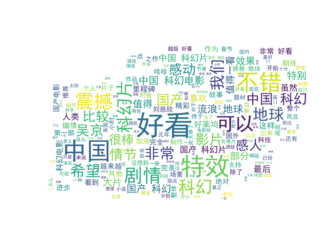

In [38]:
mp.imshow(my_wordcloud,cmap=mp.cm.gray, interpolation='bilinear')    # 显示词云图
# mp.imshow(my_wordcloud.recolor(color_func=bg_color))
mp.axis("off")             # 不显示x轴、y轴下标
mp.show()
my_wordcloud.to_file("wordcloud5.png")

### 主题分析

In [41]:
import lda
from sklearn.feature_extraction.text import CountVectorizer

def get_lda_input(chapters):
    corpus = [" ".join(word_list) for word_list in chapters]
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X.toarray(), vectorizer

In [42]:
# 训练模型函数
def lda_train(weight, vectorizer):
    model = lda.LDA(n_topics=20, n_iter=500, random_state=1)
    model.fit(weight)

    doc_num = len(weight)
    topic_word = model.topic_word_
    vocab = vectorizer.get_feature_names()
    titles = ["第{}章".format(i) for i in range(1, doc_num + 1)]

    n_top_words = 20
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1]
        print('Topic {}: {}'.format(i, ' '.join(topic_words)))

    doc_topic = model.doc_topic_
    print(doc_topic, type(doc_topic))
    plot_topic(doc_topic)
    for i in range(doc_num):
        print("{} (top topic: {})".format(titles[i], np.argsort(doc_topic[i])[:-4:-1]))

In [45]:
def main():
    chapter_list = open("流浪地球_影评01.txt", encoding='utf_8').readlines()
    chapters = chapter_list
    weight, vectorizer = get_lda_input(chapters)
    lda_train(weight, vectorizer)
    
main()

ValueError: empty vocabulary; perhaps the documents only contain stop words

#### 每日评论数据

In [11]:
# 定义每日评论总数可视化分析函数
def time_num_visualization(time):
    from pyecharts import Line
    time_list = list(set(time))
    time_dict = {time_list[i]: 0 for i in range(len(time_list))}
    time_num = []
    for i in range(len(time_list)):
        time_dict[time_list[i]] = time.count(time_list[i])
    
    # 根据数量（字典的键值）排序
    sort_dict = sorted(time_dict.items(), key=lambda d: d[0], reverse=False)
    time_name = []
    time_num = []
    print(sort_dict)
    
    for i in range(len(sort_dict)):
        time_name.append(sort_dict[i][0])
        time_num.append(sort_dict[i][1])
    
    line = Line("评论数量日期折线图")
    line.add(
        "日期-评论数",
        time_name,
        is_fill=True,
        area_color="#000",
        area_opacity=0.3,
        is_smooth=True
    )
    line.render('流浪地球_num_line.html')

In [59]:
# 读取数据的日期信息
dt_datas = pd.DataFrame(datas['日期'])
print(len(dt_datas))
# 将日期信息为空的数据删除
dt_datas = dt_datas.dropna(axis=0)
# print(dt_datas)
print(len(dt_datas))
dt_datas.info()

267019
266968
<class 'pandas.core.frame.DataFrame'>
Int64Index: 266968 entries, 0 to 267018
Data columns (total 1 columns):
日期    266968 non-null object
dtypes: object(1)
memory usage: 4.1+ MB


In [60]:
dt_datas['日期'] = pd.to_datetime(dt_datas['日期'])
dt_datas.set_index("日期", inplace=True)
dt_datas.head()

ValueError: Unknown string format